<h1 style="text-align:center;"> Phase 2 </h1>

### Objective
The goal of **Phase 2** is to evaluate the effectiveness of the **marketing campaign for the youth credit card launch** using **A/B Testing**.

### Business Analysis and A/B Testing Launch: Exploring an Untapped Market

### Insights on Customers Aged 18–25
1. Customers aged **18–25** represent approximately **25% of the total customer base**.  
2. Their **average annual income** is typically **below ₹50,000**, indicating limited purchasing capacity.  
3. This segment has **minimal credit history**, resulting in **lower credit scores and smaller credit limits**.  
4. **Credit card usage** as a payment option is **less frequent** compared to other age groups.  
5. The **average credit card transaction value** is also **lower** than that of other segments.  
6. The **most popular shopping categories** for this group are:  
    - **Fashion & Apparel**
    - **Electronics**  
   - **Beauty & Personal Care**


<h3>Visualizations</h3>
<p align="center">
  <img src="C:/Users/Shrinivass/images/pj_1.png" width="500">
  <img src="C:/Users/Shrinivass/images/pj_2.png" width="400">
</p>


## (1) Pre-Campaign

We plan to conduct a **trial run** for the launch of our new credit card.  
To achieve this, we need to determine **how many customers** should be included in our **A/B testing**.  

We will create two groups:  
- **Control Group** – existing scenario (no new credit card offer)  
- **Test Group** – exposed to the new Youth credit card offer  

The **sample size** for each group will be calculated based on the **desired statistical power** and the **expected effect size**, which will be finalized using business knowledge .  

This ensures that the A/B test results are both **statistically significant** and **business-relevant**.


In [35]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

In [37]:
alpha = 0.05
power = 0.8
effect_size=0.2

sms.tt_ind_solve_power(
    effect_size=0.2, 
    alpha=alpha, 
    power=power, 
    ratio=1, 
    alternative='two-sided'
)

393.4056989990335

For an **effect size of 2**, we require approximately **393 customers** for the test.  
However, thinking about the **budget constraints** of the campaign, we will experiment with **different effect sizes** to observe how the required sample size changes.  
This will help us to decide and determine the **most feasible and optimal sample size** for the A/B test.


In [40]:
# Calculating the required sample size for different effect sizes
effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,1]  #  standard deviations greater than control group 

for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')
    print(f"Effect Size: {effect_size}, Required Sample Size: {int(sample_size)} customers")

Effect Size: 0.1, Required Sample Size: 1570 customers
Effect Size: 0.2, Required Sample Size: 393 customers
Effect Size: 0.3, Required Sample Size: 175 customers
Effect Size: 0.4, Required Sample Size: 99 customers
Effect Size: 0.5, Required Sample Size: 63 customers
Effect Size: 1, Required Sample Size: 16 customers


According to the business requirements, the test should be able to detect a **minimum difference of 0.4 standard deviations** between the control and test groups.  
For an **effect size of 0.4**, we require around **100 customers**.  
So for this Trial run we target 100 customers

#### Forming Control and Test Groups

1. We identified around **246 customers** in the **18–25 age group**. From this segment, **100 customers** were selected for the **initial campaign launch**.  

2. The **campaign** was executed for **100 customers**, based on the **effect size calculation** and **budgetary considerations**, and ran for a **duration of two months**.  

3. The campaign achieved a **conversion rate of approximately 40%**, meaning that **40 out of 100 customers** in the **test group** began using the credit card.  

4. To ensure a **balanced comparison**, a **control group of 40 customers** was formed. This group was kept **completely separate** from the 100 customers used in the test group.  

5. Thus, we have **40 customers each** in the **control** and **test** groups for further analysis.


##### At the conclusion of the **2-month campaign period**, we collected **daily data** representing the **average transaction amounts** for both groups — the **control group** using existing credit cards and the **test group** using the newly launched Youth credit card.  

##### The primary **Key Performance Indicator (KPI)** for this A/B test is to measure the **improvement in the average transaction amount** driven by the introduction of the **new credit card**.


## (2) Post-Campaign

## Two Sample Z Test for Hypothesis Testing

In [56]:
df = pd.read_csv(r"D:\my_projects\Completed\Bank_project_stats\Phase_2\data\avg_transactions_after_campaign.csv")
df.head(4)

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85


In [58]:
df.shape

(62, 3)

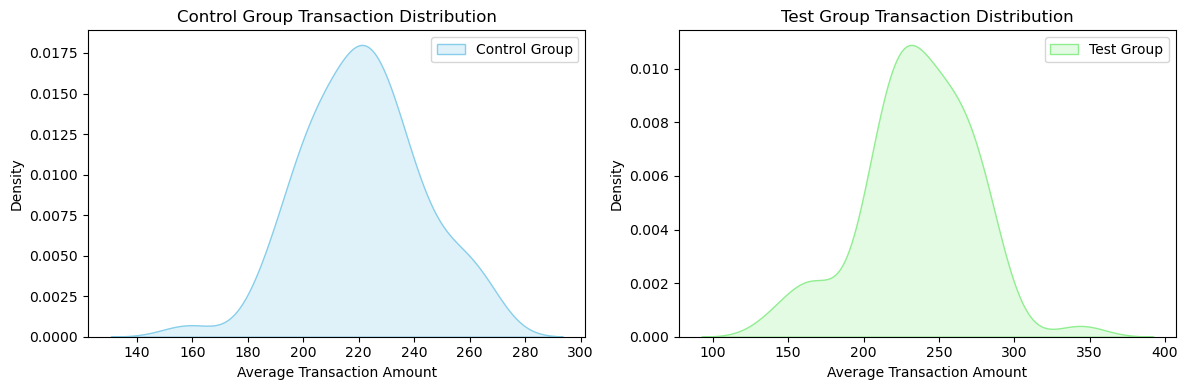

In [60]:
# Compare distributions of average transaction amounts (Control vs Test)
plt.figure(figsize=(12, 4))

# Control group distribution
plt.subplot(1, 2, 1)
sns.kdeplot(df['control_group_avg_tran'], fill=True, color='skyblue', label='Control Group')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Density')
plt.title('Control Group Transaction Distribution')
plt.legend()

# Test group distribution
plt.subplot(1, 2, 2)
sns.kdeplot(df['test_group_avg_tran'], fill=True, color='lightgreen', label='Test Group')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Density')
plt.title('Test Group Transaction Distribution')
plt.legend()

plt.tight_layout()
plt.show()


#### Performing Hypothesis Testing Using Two Sample Z-test

In [66]:
control_mean = df["control_group_avg_tran"].mean()
control_std = df["control_group_avg_tran"].std()
control_mean, control_std

(221.1751612903226, 21.359192112027014)

In [70]:
test_mean = df["test_group_avg_tran"].mean()
test_std = df["test_group_avg_tran"].std()
test_mean, test_std

(235.9835483870968, 36.65808210918637)

In [72]:
sample_size = df.shape[0]
sample_size

62

### Test Using Critical Z Value (Rejection region)

In [75]:
a = (control_std**2/sample_size)
b = (test_std**2/sample_size)

Z_score = (test_mean-control_mean)/np.sqrt(a+b)
Z_score

2.7482973745691135

In [80]:
# For a significance level of 5% (0.05) in a right-tailed test, the critical Z-value is approximately 1.645
critical_zvalue = st.norm.ppf(1 - alpha)  # Right-tailed test at 5% significance level
critical_zvalue

1.6448536269514722

In [84]:
Z_score > critical_zvalue

True

Since Z score is higher than critical Z value, we can reject the null hypothesis.

### Testing Using p-Value

In [90]:
p_value = 1 - st.norm.cdf(Z_score)
p_value

0.0029952824622024865

In [92]:
p_value < alpha

True

Since p value is less than significance level (i.e. alpha), we can reject the null hypothesis.

<h1 style="text-align:center;">📊 Phase 2: A/B Testing Analysis</h1>

---

### Hypothesis

- **Null Hypothesis (H₀):** The campaign had no significant effect on customer response or engagement.  
- **Alternative Hypothesis (H₁):** The campaign had a significant positive effect on customer response or engagement.

---

### Results

- ✅ **Z-Score** > **Critical Z-Value**  
  → This indicates that the observed difference between the groups is **statistically significant**.  

- ✅ **p-Value** < **Significance Level (α)**  
  → This provides additional evidence to **reject the null hypothesis**.

---

### Interpretation

Since both statistical conditions are satisfied:
- The campaign had a **significant impact** on customer engagement or conversion.
- The difference between the control and test groups is **not due to random chance**, but due to the campaign’s effectiveness.

---

<h2 style="text-align:center;">💳 Final Conclusion: Youth Credit Card Launch</h2>

Based on the insights from **Phase 1** and **Phase 2**:

1. **Phase 1 Findings:**  
   - The **18–25 age group** shows strong potential for credit card adoption.  
   - They are active in **Fashion & Apparel** and **Electronics** purchases.  
   - Their **credit scores** and **income levels** are suitable for an entry-level youth credit card.  

2. **Phase 2 Findings:**  
   - The **A/B testing results** confirm that the **marketing campaign** targeting this segment was **statistically effective**.  
   - The youth audience **responded positively** to the campaign.  

---

### 🚀 Final Recommendation

Given the strong data-backed evidence:
> **The Youth Credit Card can be successfully launched.**

It is recommended to:
- Focus marketing campaigns on **digital platforms** (social media, e-commerce sites).  
- Provide **exclusive discounts** on **Fashion & Electronics** categories.  
- Offer **reward points** and **cashback programs** to enhance adoption and usage.

---

✅ **Overall Conclusion:**  
The data-driven analysis from both phases strongly supports the **launch of the Youth Credit Card**, targeting the **18–25 age group** as the **primary market segment**.
